In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


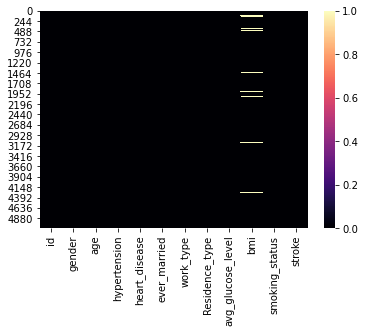

In [5]:
sns.heatmap(df.isna(), cmap='magma')

As we can see from the .info() command, the bmi columns are missing about 100 data. But in the heatmap we see that the missing values are actually not too significant, so we're just gonna drop the entire missing values.

In [6]:
df2=df.dropna()

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [8]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Some EDA

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


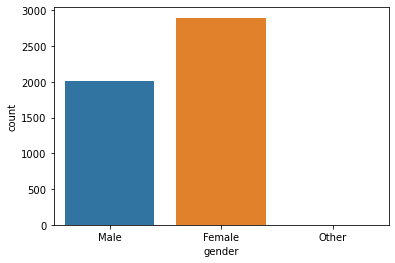

In [9]:
sns.countplot(x='gender', data=df2)
print(df['gender'].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


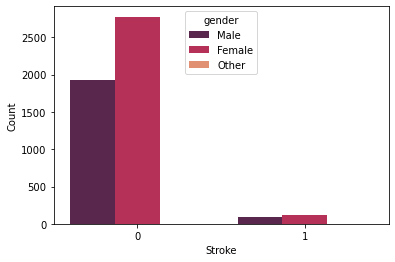

In [10]:
sns.countplot(x='stroke', data=df2, palette='rocket', hue='gender')
plt.xlabel('Stroke')
plt.ylabel('Count')
print(df['stroke'].value_counts())

As we can see, the data is heavily imbalanced. We're going to have to deal with this later on.

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


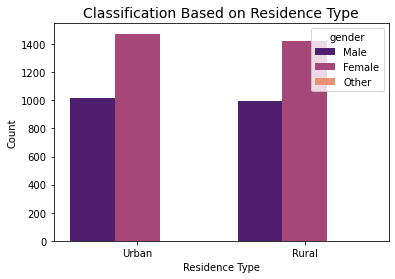

In [11]:
sns.countplot(x='Residence_type', data=df2, palette='magma', hue='gender')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.title('Classification Based on Residence Type', fontsize=14)
print(df['Residence_type'].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


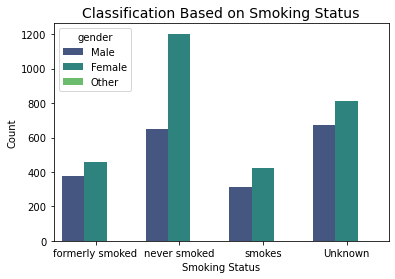

In [12]:
sns.countplot(x='smoking_status', data=df2, palette='viridis', hue='gender')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Classification Based on Smoking Status', fontsize=14)
print(df['smoking_status'].value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64


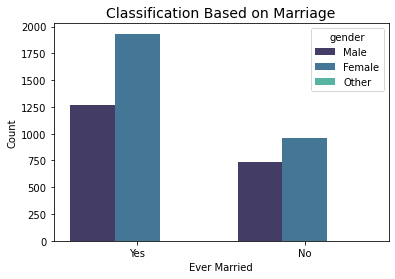

In [13]:
sns.countplot(x='ever_married', data=df2, palette='mako', hue='gender')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.title('Classification Based on Marriage', fontsize=14)
print(df['ever_married'].value_counts())

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


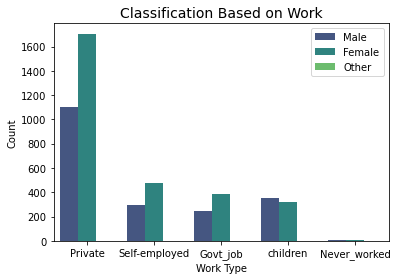

In [14]:
sns.countplot(x='work_type', data=df2, palette='viridis', hue='gender')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.title('Classification Based on Work', fontsize=14)
print(df['work_type'].value_counts())
plt.legend(loc='upper right')

## Turn Categorical Columns into Numerical Values

Using One Hot encoding, we should transform categorical columns such as gender, ever_married, work_type, Residence_type and smoking_status into numerical columns

In [15]:
gender=pd.get_dummies(df2['gender'], drop_first=True)
married=pd.get_dummies(df2['ever_married'], drop_first=True)
work=pd.get_dummies(df2['work_type'], drop_first=True)
reside=pd.get_dummies(df2['Residence_type'], drop_first=True)
smoke=pd.get_dummies(df2['smoking_status'], drop_first=True)

Concat to the dataframe (df2) and make it into a new dataframe

In [16]:
ndf=pd.concat([df2,gender,married,work,reside,smoke], axis=1)

In [17]:
ndf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,1,0,1,0,0,1,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,...,0,1,0,1,0,0,1,1,0,0


Drop 'id' column and also the original categorical columns

In [18]:
ndf.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status'], axis=1, inplace=True)

In [19]:
ndf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0


## Deal with the imbalanced data

What we're gonna do is that we're gonna oversample the minority data (stroke=1) and undersample the majority data (stroke=0). <br>
<br>
We are going to use SMOTE for the oversampling process and RandomUnderSampler for the undersampling process

First we separate the target and the features

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=ndf.drop('stroke', axis=1)

In [22]:
y=ndf['stroke']

Import SMOTE and RandomUnderSampler

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [24]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [25]:
y.value_counts()

1    4700
0    4700
Name: stroke, dtype: int64

Now we do train test split with test size = 30%

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=101)

We can see that the y dataframe is now evenly distributed. Now we build the model.

## Building model

For this project we're gonna use Logistic Regression, Random Forest, KNN, and Gaussian Naive Bayes and then we're gonna compare the scores of each model.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Elbow method for optimal number of n_neighbors in KNN

In [28]:
err_rate=[]

for i in range (1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

([<matplotlib.axis.XTick at 0x2456e877670>,
 <a list of 49 Text major ticklabel objects>)

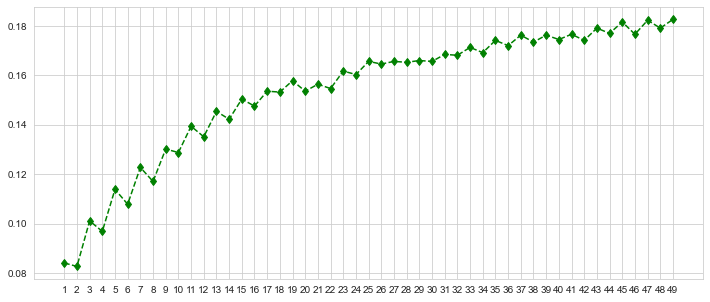

In [29]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
plt.plot(range(1,50),err_rate, color='green', marker='d', ls='--')
plt.xticks(np.arange(1,50,1))

So the optimal number of n_neighbors is 2

In [30]:
lm=LogisticRegression()
rfc=RandomForestClassifier()
gnb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=2)

In [31]:
lm.fit(X_train,y_train)
rfc.fit(X_train,y_train)
gnb.fit(X_train,y_train)
knn.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=2)

In [32]:
lmpredict=lm.predict(X_test)
rfcpredict=rfc.predict(X_test)
gnbpredict=gnb.predict(X_test)
knnpredict=knn.predict(X_test)

## Comparison

Use classification report to determine which model fits this project best.

In [33]:
from sklearn.metrics import classification_report

In [34]:
print('Classification report for Logistic Regression')
print(classification_report(lmpredict,y_test))

Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1403
           1       0.85      0.85      0.85      1417

    accuracy                           0.85      2820
   macro avg       0.85      0.85      0.85      2820
weighted avg       0.85      0.85      0.85      2820



In [35]:
print('Classification report for Random Forest Classifier')
print(classification_report(rfcpredict,y_test))

Classification report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1357
           1       0.97      0.94      0.95      1463

    accuracy                           0.95      2820
   macro avg       0.95      0.95      0.95      2820
weighted avg       0.95      0.95      0.95      2820



In [36]:
print('Classification report for KNN')
print(classification_report(knnpredict,y_test))

Classification report for KNN
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1315
           1       0.95      0.89      0.92      1505

    accuracy                           0.92      2820
   macro avg       0.92      0.92      0.92      2820
weighted avg       0.92      0.92      0.92      2820



In [37]:
print('Classification report for GNB')
print(classification_report(gnbpredict,y_test))

Classification report for GNB
              precision    recall  f1-score   support

           0       0.31      0.97      0.47       442
           1       0.99      0.59      0.74      2378

    accuracy                           0.65      2820
   macro avg       0.65      0.78      0.60      2820
weighted avg       0.88      0.65      0.70      2820



## Thank You